# ML Assigment

Vuyo Ncume 2095458 <br/>
Vhugala Mudau 2094007 <br/>
Amatullah Mthethwa 1870175 <br/>
Melissa Mmatshaka 2111308 <br/>
Rumbidzai Moyo 1856080

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from math import exp

### The data:

In [2]:
d = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# dropping missing values if there are any
data = d.dropna().copy()

# dropping duplicate values
data.drop_duplicates(keep=False,inplace=True)

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Summary of stats

In [26]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


People with diabetes: 



<AxesSubplot:ylabel='Frequency'>

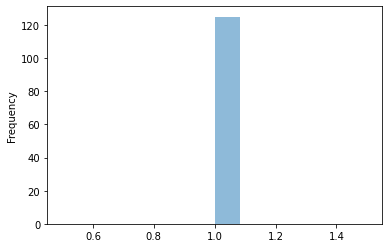

In [14]:
temp = data.loc[data['diabetes'] == 1]['diabetes']
print('People with diabetes: \n')
temp.plot.hist(bins=12, alpha=0.5)

People with high blood pressure: 



<AxesSubplot:ylabel='Frequency'>

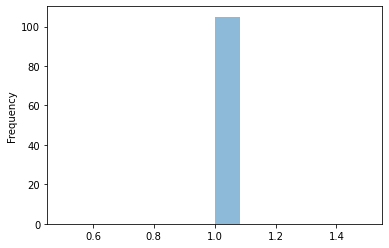

In [21]:
temp = data.loc[data['high_blood_pressure'] == 1]['high_blood_pressure']
print('People with high blood pressure: \n')
temp.plot.hist(bins=12, alpha=0.5)

Males:


<AxesSubplot:ylabel='Frequency'>

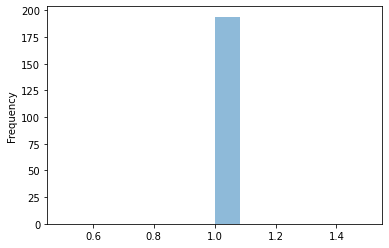

In [19]:
males = data.loc[data['sex'] == 1]['sex']
print('Males:')
males.plot.hist(bins=12, alpha=0.5)

Females:


<AxesSubplot:ylabel='Frequency'>

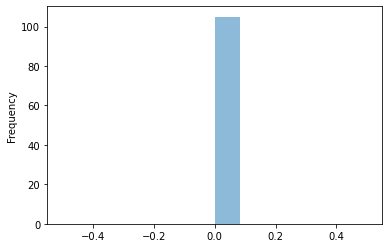

In [24]:
females = data.loc[data['sex'] == 0]['sex']
print('Females:')
females.plot.hist(bins=12, alpha=0.5)

### Splitting into training, validation and testing data

Note: 60% of the data is for training, 20% for validation and the rest for testing.

In [3]:
training_data = data.loc[0:179,]
training_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
175,60.0,1,95,0,60,0,337000.0,1.0,138,1,1,146,0
176,69.0,0,1419,0,40,0,105000.0,1.0,135,1,1,147,0
177,49.0,1,69,0,50,0,132000.0,1.0,140,0,0,147,0
178,63.0,1,122,1,60,0,267000.0,1.2,145,1,0,147,0
179,55.0,0,835,0,40,0,279000.0,0.7,140,1,1,147,0


In [4]:
validation_data = data.loc[180:239,]
validation_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
235,77.0,1,109,0,50,1,406000.00,1.10,137,1,0,209,0
236,75.0,0,119,0,50,1,248000.00,1.10,148,1,0,209,0
237,70.0,0,232,0,30,0,173000.00,1.20,132,1,0,210,0
238,65.0,1,720,1,40,0,257000.00,1.00,136,0,0,210,0
239,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,211,0


In [5]:
testing_data = data.loc[240:298,]
testing_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## Logistic Regression

In [6]:
# Defining the X and Y matrices
Y = training_data['DEATH_EVENT'].values
X = training_data[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']]

# validation and test data
Y_validate = validation_data['DEATH_EVENT'].values
X_validate = validation_data[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']]
Y_test = testing_data['DEATH_EVENT'].values
X_test = testing_data[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']]

### find best feature to work with 

Survived: 



<AxesSubplot:ylabel='Frequency'>

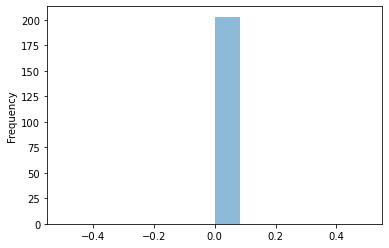

In [11]:
#split deaths and survives
survived = data.loc[data['DEATH_EVENT'] == 0]
print('Survived: \n')
survived['DEATH_EVENT'].plot.hist(bins=12, alpha=0.5)

Died: 



<AxesSubplot:ylabel='Frequency'>

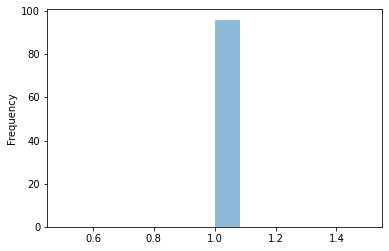

In [12]:
deaths = data.loc[data['DEATH_EVENT'] == 1]
print('Died: \n')
deaths['DEATH_EVENT'].plot.hist(bins=12, alpha=0.5)

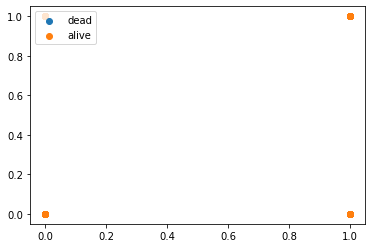

In [56]:
# scatter plot
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(deaths['anaemia'].to_numpy(), deaths['smoking'].to_numpy(), label='dead')
ax1.scatter(survived['anaemia'].to_numpy(), survived['smoking'].to_numpy(), label='alive')
plt.legend(loc='upper left')
plt.show()

The algorithm:

In [ ]:
# returns value between 0 and 1
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

# gradient descent to find optimal parameters for theta
def LG(x, y, learning_rate, iterations, parameters, bias): 
    size = x.shape[0]
    weights = parameters
    loss = 0
    for i in range(iterations): 
        sigma = sigmoid(np.dot(x, weights))
        loss = np.sum(y * np.log(sigma) + (1 - y) * np.log(1-sigma))
        dW = np.dot(x.T, (sigma - y))
        db = 1/size * np.sum(sigma - y)
        weights -= learning_rate * dW
        bias -= learning_rate * db 
    
    return weights, bias, loss

In [ ]:
#train

In [ ]:
# results
output_values = np.dot(x_testing, parameters_out) + bias
predictions = sigmoid(output_values) >= 1/2
actual = y_testing[:] == 1
        
print('Confusion Matrix: \n', confusion_matrix(actual, predictions))
print('error: ', -loss)